In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [30]:
df = pd.read_csv("HR_DATASET.csv")
df.shape

(917, 35)

In [31]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [32]:
df = df.drop(['EducationField','EmployeeCount','EmployeeNumber','StandardHours','Over18',],axis=1)

In [34]:
df.shape

(917, 30)

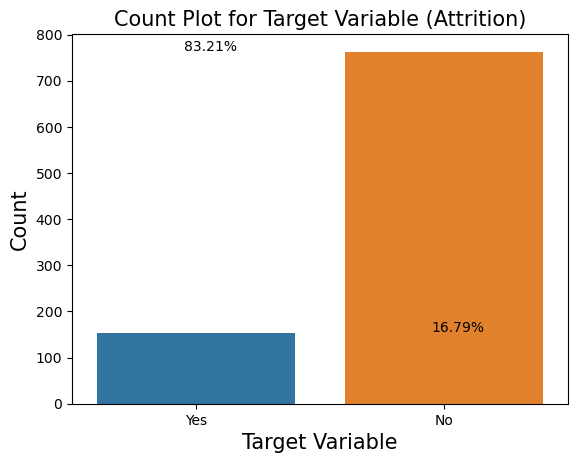

In [38]:
# consider only the target variable
df_target = df['Attrition'].copy()

# get counts of 0's and 1's in the 'Chance of Admit' variable
df_target.value_counts()

# plot the countplot of the variable 'Chance of Admit'
sns.countplot(x = df_target)

# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

plt.title('Count Plot for Target Variable (Attrition)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

In [39]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [40]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [41]:
data.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,917.000000,917,917,917.000000,917,917.000000,917.000000,917,917.000000,917.000000,917.000000,917,917.000000,917.000000,917.000000,917,917.000000,917,917.000000,917.000000,917.000000,917,917,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,763,648,NaN,597,NaN,NaN,385,NaN,NaN,NaN,550,NaN,NaN,NaN,203,NaN,436,NaN,NaN,NaN,917,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.938931,NaN,NaN,785.711014,NaN,9.294438,2.921483,NaN,1.000000,1413.466739,2.738277,NaN,66.231189,2.721919,2.044711,NaN,2.688113,NaN,6452.293348,14428.468920,2.696838,NaN,NaN,15.214831,3.149400,2.637950,80.000000,0.821156,11.179935,2.791712,2.760087,6.972737,4.217012,2.147219,4.062159
std,8.984981,NaN,NaN,401.902148,NaN,8.092566,1.020717,NaN,0.000000,388.606884,1.103382,NaN,20.237536,0.720936,1.100400,NaN,1.110097,NaN,4685.137761,7188.332799,2.489217,NaN,NaN,3.640007,0.356677,1.078673,0.000000,0.864555,7.802790,1.292917,0.708047,5.951250,3.588223,3.176250,3.571395
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1051.000000,2097.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,444.000000,NaN,2.000000,2.000000,NaN,1.000000,1084.000000,2.000000,NaN,49.000000,2.000000,1.000000,NaN,2.000000,NaN,2933.000000,8018.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,772.000000,NaN,7.000000,3.000000,NaN,1.000000,1425.000000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4877.000000,14255.000000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1141.000000,NaN,14.000000,4.000000,NaN,1.000000,1737.000000,4.000000,NaN,84.000000,3.000000,3.000000,NaN,4.000000,NaN,8103.000000,20763.000000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       917 non-null    int64 
 1   Attrition                 917 non-null    object
 2   BusinessTravel            917 non-null    object
 3   DailyRate                 917 non-null    int64 
 4   Department                917 non-null    object
 5   DistanceFromHome          917 non-null    int64 
 6   Education                 917 non-null    int64 
 7   EducationField            917 non-null    object
 8   EmployeeCount             917 non-null    int64 
 9   EmployeeNumber            917 non-null    int64 
 10  EnvironmentSatisfaction   917 non-null    int64 
 11  Gender                    917 non-null    object
 12  HourlyRate                917 non-null    int64 
 13  JobInvolvement            917 non-null    int64 
 14  JobLevel                  

In [43]:
data_majority = data[data.Attrition == 'No']
data_minority = data[data.Attrition == 'Yes']

In [44]:
data_majority_undersampled = resample(data_majority, 
                                      replace=False,    # sample without replacement
                                      n_samples=len(data_minority), # to match minority class
                                      random_state=42)

In [45]:
data_undersampled = pd.concat([data_majority_undersampled, data_minority])

In [46]:
data_undersampled['Attrition'].value_counts()

Attrition
No     154
Yes    154
Name: count, dtype: int64

In [47]:
data_undersampled

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
440,25,No,Travel_Rarely,1372,Sales,18,1,Life Sciences,1,1399,1,Male,93,4,2,Sales Executive,3,Married,6232,12477,2,Y,No,11,3,2,80,0,6,3,2,3,2,1,2
325,42,No,Non-Travel,179,Human Resources,2,5,Medical,1,1231,4,Male,79,4,2,Human Resources,1,Married,6272,12858,7,Y,No,16,3,1,80,1,10,3,4,4,3,0,3
902,40,No,Travel_Rarely,1322,Research & Development,2,4,Life Sciences,1,2048,3,Male,52,2,1,Research Scientist,3,Single,2809,2725,2,Y,No,14,3,4,80,0,8,2,3,2,2,2,2
242,37,No,Travel_Rarely,309,Sales,10,4,Life Sciences,1,1105,4,Female,88,2,2,Sales Executive,4,Divorced,6694,24223,2,Y,Yes,14,3,3,80,3,8,5,3,1,0,0,0
411,34,No,Travel_Rarely,507,Sales,15,2,Medical,1,1356,3,Female,66,3,2,Sales Executive,1,Single,6125,23553,1,Y,No,12,3,4,80,0,10,6,4,10,8,9,6
710,42,No,Travel_Rarely,855,Research & Development,12,3,Medical,1,1768,2,Male,57,3,1,Laboratory Technician,2,Divorced,2766,8952,8,Y,No,22,4,2,80,3,7,6,2,5,3,0,4
909,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,2,Female,60,2,4,Sales Executive,4,Married,12031,8828,0,Y,No,11,3,1,80,1,21,2,2,20,9,9,6
170,46,No,Travel_Rarely,566,Research & Development,7,2,Medical,1,1007,4,Male,75,3,3,Manufacturing Director,3,Divorced,10845,24208,6,Y,No,13,3,2,80,1,13,3,3,8,7,0,7
81,25,No,Travel_Rarely,141,Sales,3,1,Other,1,879,3,Male,98,3,2,Sales Executive,1,Married,4194,14363,1,Y,Yes,18,3,4,80,0,5,3,3,5,3,0,3
277,41,No,Travel_Rarely,167,Research & Development,12,4,Life Sciences,1,1158,2,Male,46,3,1,Laboratory Technician,4,Married,4766,9051,3,Y,Yes,11,3,1,80,1,6,4,3,1,0,0,0


In [48]:
new = 'data_undersampled.xlsx'

data_undersampled.to_excel(new)

In [50]:
df2 = pd.read_excel('data_undersampled.xlsx')

In [51]:
df2.shape

(308, 36)

In [54]:
df2 = df2.drop('Unnamed: 0',axis=1)

In [58]:
df2 = df2.drop(['EducationField','EmployeeCount','EmployeeNumber','StandardHours','Over18'],axis=1)

In [59]:
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,25,No,Travel_Rarely,1372,Sales,18,1,1,Male,93,4,2,Sales Executive,3,Married,6232,12477,2,No,11,3,2,0,6,3,2,3,2,1,2
1,42,No,Non-Travel,179,Human Resources,2,5,4,Male,79,4,2,Human Resources,1,Married,6272,12858,7,No,16,3,1,1,10,3,4,4,3,0,3
2,40,No,Travel_Rarely,1322,Research & Development,2,4,3,Male,52,2,1,Research Scientist,3,Single,2809,2725,2,No,14,3,4,0,8,2,3,2,2,2,2
3,37,No,Travel_Rarely,309,Sales,10,4,4,Female,88,2,2,Sales Executive,4,Divorced,6694,24223,2,Yes,14,3,3,3,8,5,3,1,0,0,0
4,34,No,Travel_Rarely,507,Sales,15,2,3,Female,66,3,2,Sales Executive,1,Single,6125,23553,1,No,12,3,4,0,10,6,4,10,8,9,6


In [60]:
df2.shape

(308, 30)

df2 is the clean data

In [91]:
categorical_cols = ['BusinessTravel', 'Department', 'Education', 'EnvironmentSatisfaction', 
                    'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 
                    'MaritalStatus', 'OverTime', 'PerformanceRating','RelationshipSatisfaction','StockOptionLevel']
categorical_df = df2[categorical_cols]

In [92]:
categorical_df.head()

,BusinessTravel,Department,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel
0,Travel_Rarely,Sales,1,1,Male,4,2,Sales Executive,3,Married,No,3,2,0
1,Non-Travel,Human Resources,5,4,Male,4,2,Human Resources,1,Married,No,3,1,1
2,Travel_Rarely,Research & Development,4,3,Male,2,1,Research Scientist,3,Single,No,3,4,0
3,Travel_Rarely,Sales,4,4,Female,2,2,Sales Executive,4,Divorced,Yes,3,3,3
4,Travel_Rarely,Sales,2,3,Female,3,2,Sales Executive,1,Single,No,3,4,0


In [93]:
categorical_df.shape

(308, 14)

In [95]:
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
                  'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 
                  'TrainingTimesLastYear', 'WorkLifeBalance']

In [97]:
numerical_df = df2[numerical_cols]

In [98]:
numerical_df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance
0,25,1372,18,93,6232,2,11,6,3,2
1,42,179,2,79,6272,7,16,10,3,4
2,40,1322,2,52,2809,2,14,8,2,3
3,37,309,10,88,6694,2,14,8,5,3
4,34,507,15,66,6125,1,12,10,6,4


In [99]:
from sklearn.pipeline import Pipeline

In [100]:
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
from sklearn.compose import ColumnTransformer

In [104]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_cols),
        ('cat', categorical_preprocessor, categorical_cols)
    ])

# Preprocess features
X = df2[numerical_cols + categorical_cols]
X_transformed = preprocessor.fit_transform(X)

# Add the 'Attrition' column
y = df2['Attrition']

In [105]:
from sklearn.compose import ColumnTransformer

In [106]:
feature_names = (numerical_cols + 
                 list(preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)))

In [107]:
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)

In [108]:
final_df = pd.concat([X_transformed_df, y.reset_index(drop=True)], axis=1)

In [111]:
final_df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Female,Gender_Male,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,Attrition
0,-1.115940,1.528105,1.027073,1.336658,0.145274,-0.327076,-1.119689,-0.495622,0.238199,-0.916044,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0
1,0.671476,-1.415378,-0.932438,0.656740,0.154841,1.632835,0.248820,0.028054,0.238199,1.696378,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0
2,0.461192,1.404740,-0.932438,-0.654532,-0.673430,-0.327076,-0.298584,-0.233784,-0.550676,0.390167,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0
3,0.145765,-1.094630,0.047318,1.093830,0.255774,-0.327076,-0.298584,-0.233784,1.815950,0.390167,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0
4,-0.169661,-0.606106,0.659665,0.025387,0.119682,-0.719058,-0.845987,0.028054,2.604825,1.696378,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.

In [110]:
final_df['Attrition'] = final_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [113]:
final_X = final_df.drop('Attrition', axis =1)
final_Y = final_df['Attrition']

In [114]:
final_df = sm.add_constant(final_df)

X_train, X_test, y_train, y_test = train_test_split(final_X, final_Y, random_state = 10, test_size = 0.2)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (246, 65)
y_train (246,)
X_test (62, 65)
y_test (62,)


In [115]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [116]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

         Current function value: 0.376548
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  246
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                           49
Date:                Thu, 25 Jul 2024   Pseudo R-squ.:                  0.4567
Time:                        19:52:53   Log-Likelihood:                -92.631
converged:                      False   LL-Null:                       -170.48
Covariance Type:            nonrobust   LLR p-value:                 4.863e-13
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.1733        nan        nan        nan         nan         

C:\Users\Ranjani\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [117]:
print('AIC:', logreg.aic)

AIC: 285.26140484795303


In [168]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns=['Odds'])
df_odds = df_odds.sort_values(by='Odds', ascending=False)
df_odds

,Odds
JobLevel_5,417854954013300096.000000
JobRole_Sales Executive,26603257111.743969
JobRole_Sales Representative,5816178696.591384
Department_Research & Development,8123.135388
JobRole_Human Resources,86.263233
Department_Human Resources,86.263232
JobRole_Manufacturing Director,16.854008
JobInvolvement_1,5.055526
MaritalStatus_Single,4.079784
RelationshipSatisfaction_1,3.925207


In [119]:
y_pred_prob = logreg.predict(X_test)
y_pred_prob.head()

111   0.000000
283   0.028588
238   0.579776
127   0.688643
189   0.808349
dtype: float64

In [120]:
y_pred_prob

111   0.000000
283   0.028588
238   0.579776
127   0.688643
189   0.808349
1     0.025958
59    0.062371
130   1.000000
281   0.751715
202   0.011134
213   0.944927
186   0.704354
301   0.524850
167   0.914970
227   0.866668
92    0.248790
228   0.938148
205   0.987235
24    0.073880
34    0.557112
121   0.461156
26    0.909686
292   0.636295
64    0.794491
197   0.899580
162   0.699424
269   0.881774
198   0.527661
231   0.181921
306   0.023479
47    0.323189
52    0.816210
258   0.037232
139   0.038563
196   0.971193
215   0.869225
25    0.154929
104   0.000000
105   0.197845
119   0.013024
163   1.000000
172   0.858452
43    0.122219
194   0.014249
80    0.002480
278   0.901014
187   0.948891
56    0.533676
98    0.982273
106   0.119677
151   1.000000
87    0.069956
307   0.704098
113   1.000000
36    0.954649
10    0.851633
282   0.790208
294   0.820290
193   0.159324
126   0.053100
288   0.992307
207   0.439429
dtype: float64

In [121]:
y_test

111    0
283    1
238    1
127    0
189    1
1      0
59     0
130    0
281    1
202    1
213    1
186    1
301    1
167    1
227    1
92     0
228    1
205    1
24     0
34     0
121    0
26     0
292    1
64     0
197    1
162    1
269    1
198    1
231    1
306    1
47     0
52     0
258    1
139    0
196    1
215    1
25     0
104    0
105    0
119    0
163    1
172    1
43     0
194    1
80     0
278    1
187    1
56     0
98     0
106    0
151    0
87     0
307    1
113    0
36     0
10     0
282    1
294    1
193    1
126    0
288    1
207    1
Name: Attrition, dtype: int64

In [122]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [123]:
y_pred[0:5]
#again coming to 60% probability

[0, 0, 1, 1, 1]

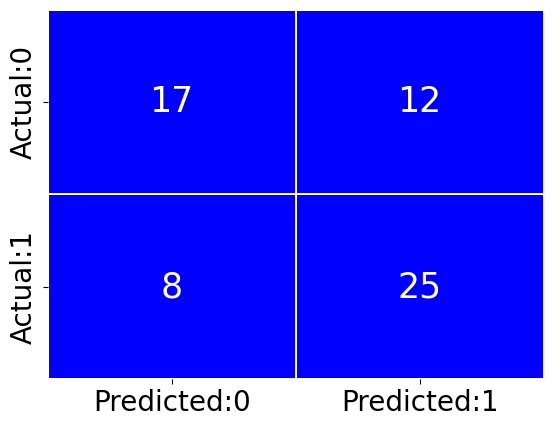

In [124]:
# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['blue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

plt.show()

In [125]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

In [126]:
# calculate the precision value
precision = TP / (TP+FP)
precision

0.6756756756756757

In [127]:
# calculate the recall value
recall = TP / (TP+FN)
recall

0.7575757575757576

In [128]:
# calculate the specificity value
specificity = TN / (TN+FP)
specificity

0.5862068965517241

In [129]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
accuracy

0.6774193548387096

In [130]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.68      0.59      0.63        29
           1       0.68      0.76      0.71        33

    accuracy                           0.68        62
   macro avg       0.68      0.67      0.67        62
weighted avg       0.68      0.68      0.67        62



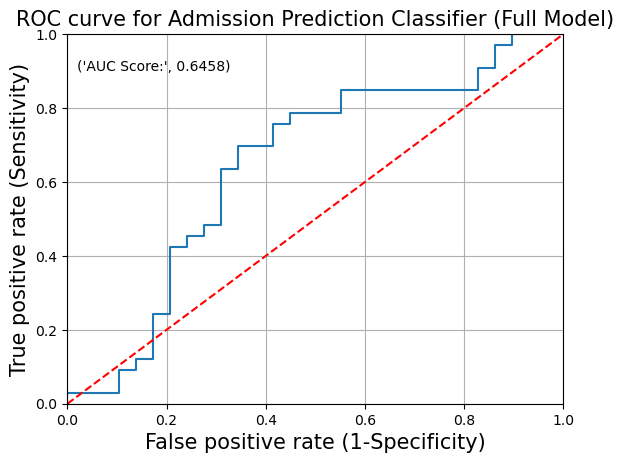

In [131]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

In [134]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.696970,0.344828,0.579776,0.352142
1,0.757576,0.413793,0.524850,0.343783
2,0.787879,0.448276,0.439429,0.339603
3,0.636364,0.310345,0.699424,0.326019
4,0.757576,0.448276,0.461156,0.309300


In [136]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.58 else 1 for x in y_pred_prob]

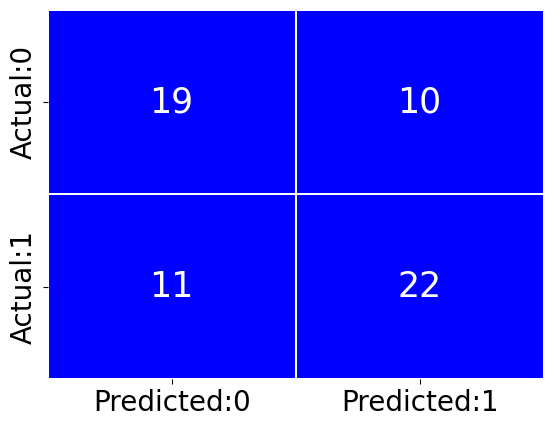

In [137]:
cm = confusion_matrix(y_test, y_pred_youden)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['blue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

In [138]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_youden)
print(acc_table)

              precision    recall  f1-score   support

           0       0.63      0.66      0.64        29
           1       0.69      0.67      0.68        33

    accuracy                           0.66        62
   macro avg       0.66      0.66      0.66        62
weighted avg       0.66      0.66      0.66        62



In [ ]:
#Next trying decision tree

In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

In [142]:
X_train, X_test, y_train, y_test = train_test_split(final_X, final_Y, random_state = 10, test_size = 0.2)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (246, 65)
y_train (246,)
X_test (62, 65)
y_test (62,)


In [143]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [144]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

# Decision Tree for Classification

In [145]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [147]:
!pip install graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------------------------- ------------- 30.7/47.1 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 784.8 kB/s eta 0:00:00


In [148]:
# save the column names in 'labels'
labels = X_train.columns

# export a decision tree in DOT format
# pass the 'decision_tree' to export it to Graphviz
# pass the column names to 'feature_names'
# pass the required class labels to 'class_names'
dot_data = tree.export_graphviz(decision_tree, feature_names = labels, class_names = ["0","1"])  

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
Image(graph.create_png())

# double-click on the image below to get an expanded view

NameError: name 'tree' is not defined

In [151]:
!pip install pydotplus
from sklearn import tree
import pydotplus
from IPython.display import Image

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     -- ---------------------------------- 20.5/278.7 kB 640.0 kB/s eta 0:00:01
     ------ ------------------------------ 51.2/278.7 kB 871.5 kB/s eta 0:00:01
     ---------- -------------------------- 81.9/278.7 kB 762.6 kB/s eta 0:00:01
     -------------------- ----------------- 153.6/278.7 kB 1.0 MB/s eta 0:00:01
     -------------------- ----------------- 153.6/278.7 kB 1.0 MB/s eta 0:00:01
     -------------------- ----------------- 153.6/278.7 kB 1.0 MB/s eta 0:00:01
     -------------------- ----------------- 153.6/278.7 kB 1.0 MB/s eta 0:00:01
     -------------------- ----------------- 153.6/278.7 kB 1.0 MB/s eta 0:00:01
     -------------------- ----------------- 153.6/278.7 kB 1.0 MB/s eta 0:00:01
     -------------------- ----------------- 153.6/278.7 kB 1.0 MB/s eta 0:00:01
     --------------------------- -------- 215.0/278.7 kB 374.4 kB/s eta 0:00:01
     ------------------------------ ----- 235.5

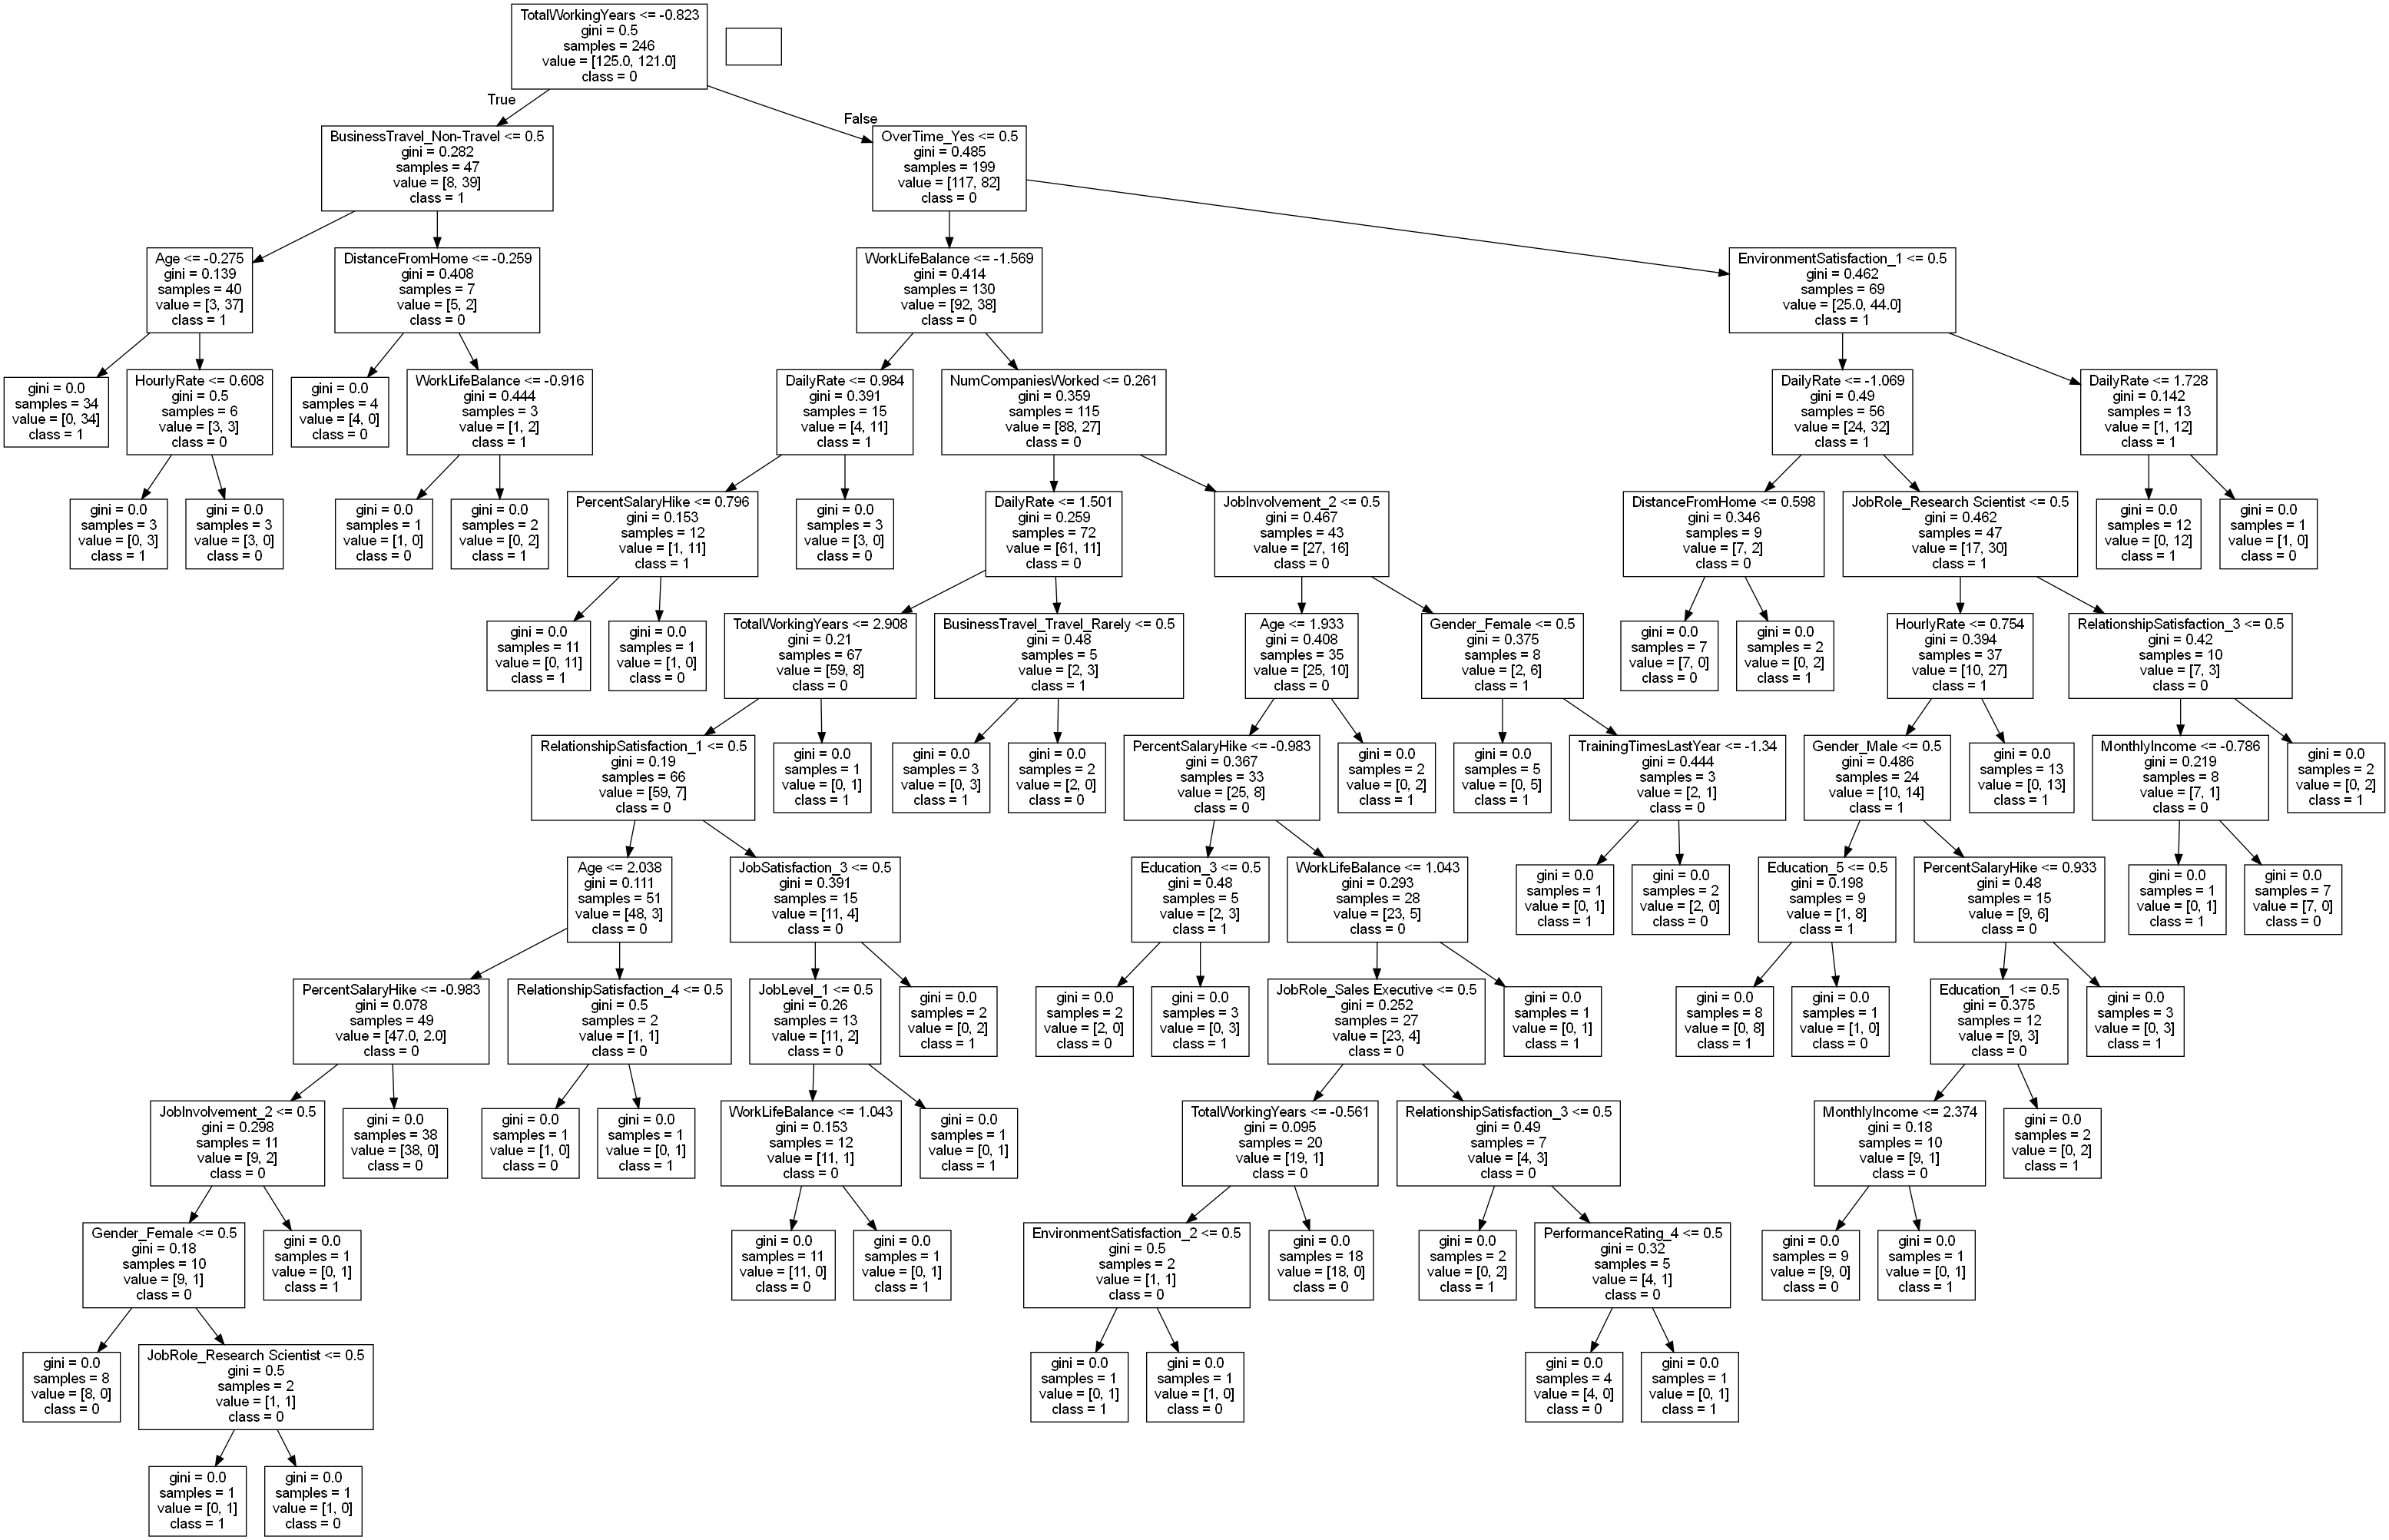

In [152]:
from sklearn import tree
import pydotplus
from IPython.display import Image

# Assuming decision_tree is a trained DecisionTreeClassifier or DecisionTreeRegressor
# and X_train is your feature set

# Save the column names in 'labels'
labels = X_train.columns

# Export a decision tree in DOT format
dot_data = tree.export_graphviz(decision_tree, feature_names=labels, class_names=["0", "1"])

# Plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree
Image(graph.create_png())

In [153]:
train_report = get_train_report(decision_tree)

print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       121

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246



In [154]:
test_report = get_test_report(decision_tree)

print(test_report)

              precision    recall  f1-score   support

           0       0.54      0.45      0.49        29
           1       0.58      0.67      0.62        33

    accuracy                           0.56        62
   macro avg       0.56      0.56      0.56        62
weighted avg       0.56      0.56      0.56        62



In [155]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

# fit the model using fit() on train data
decision_tree = dt_model.fit(X_train, y_train)


train_report = get_train_report(decision_tree)

# print the performance measures
print('Train data:\n', train_report)


test_report = get_test_report(decision_tree)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       125
           1       0.76      0.76      0.76       121

    accuracy                           0.76       246
   macro avg       0.76      0.76      0.76       246
weighted avg       0.76      0.76      0.76       246

Test data:
               precision    recall  f1-score   support

           0       0.62      0.69      0.66        29
           1       0.70      0.64      0.67        33

    accuracy                           0.66        62
   macro avg       0.66      0.66      0.66        62
weighted avg       0.66      0.66      0.66        62



In [156]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass the range of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass the range of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the range of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the range of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

<IPython.core.display.Javascript object>

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': 8, 'min_samples_leaf': 9, 'min_samples_split': 2} 



In [157]:
# instantiate the 'DecisionTreeClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train, y_train)

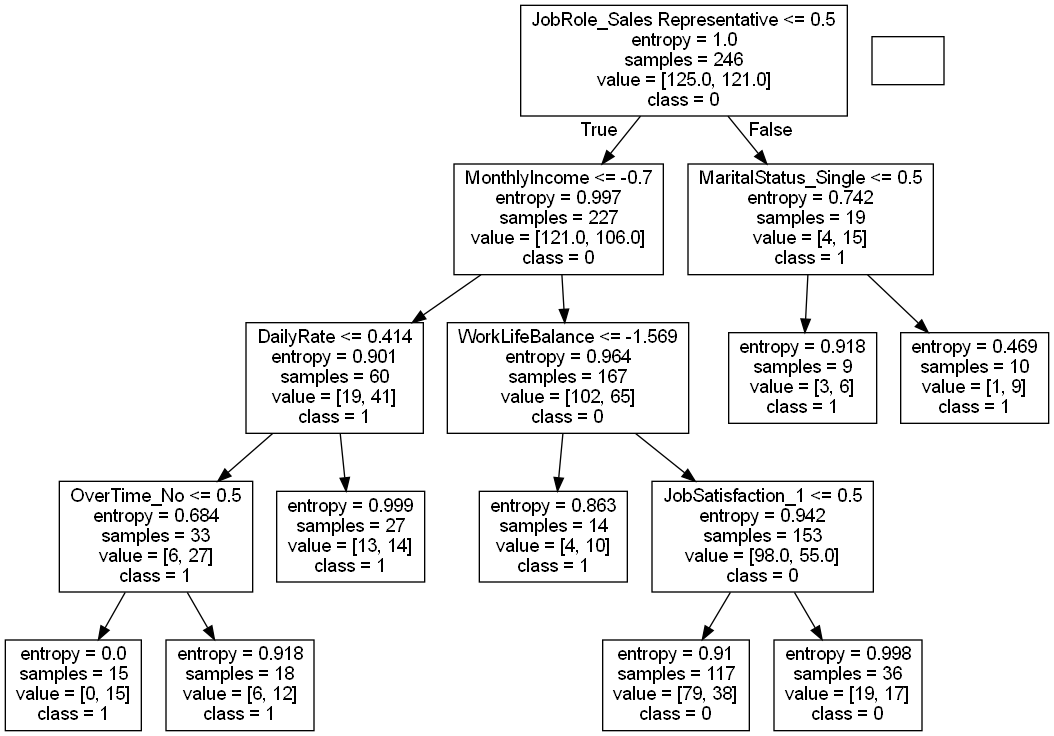

In [158]:
# save the column names in 'labels'
labels = X_train.columns


dot_data = tree.export_graphviz(dt_model, feature_names = labels, class_names = ["0","1"])  

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
Image(graph.create_png())


In [159]:
print('Classification Report for train set: \n', get_train_report(dt_model))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.64      0.78      0.71       125
           1       0.71      0.55      0.62       121

    accuracy                           0.67       246
   macro avg       0.68      0.66      0.66       246
weighted avg       0.67      0.67      0.66       246



## Random Forest for Classification

In [160]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

In [161]:
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report) 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       125
           1       0.99      0.98      0.98       121

    accuracy                           0.98       246
   macro avg       0.98      0.98      0.98       246
weighted avg       0.98      0.98      0.98       246



In [162]:
test_report = get_test_report(rf_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.57      0.79      0.67        29
           1       0.73      0.48      0.58        33

    accuracy                           0.63        62
   macro avg       0.65      0.64      0.62        62
weighted avg       0.66      0.63      0.62        62



In [163]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

<IPython.core.display.Javascript object>

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 50} 



In [164]:
# instantiate the 'RandomForestClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.63      0.76      0.69        29
           1       0.74      0.61      0.67        33

    accuracy                           0.68        62
   macro avg       0.68      0.68      0.68        62
weighted avg       0.69      0.68      0.68        62



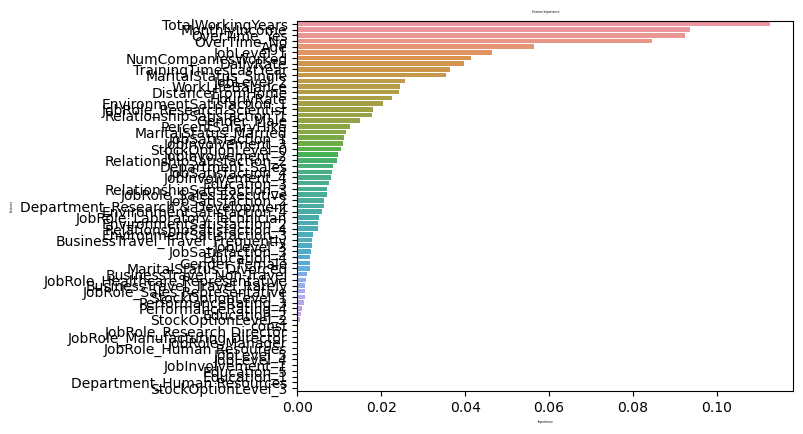

In [167]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 2)
plt.xlabel('Importance', fontsize = 2)
plt.ylabel('Features', fontsize = 2)

plt.show()